# **Aggregations and GroupBy in Pandas**


In [475]:
import pandas as pd


---



## **Table of Contents**

1. **Introduction to Aggregations, GroupBy, and Apply**
2. **Basic Aggregations**
   - Common Aggregation Functions
   - Aggregating Multiple Columns
3. **GroupBy Operations**
   - Splitting Data with `groupby()`
   - Applying Aggregations to Groups
   - GroupBy with Multiple Columns
4. **Custom Aggregations with `agg()`**
5. **Filtering Groups with `filter()`**
6. **Transforming Data with `transform()`**
7. **Applying Functions with `apply()`**
8. **Differences Between `apply()` and `transform()`**

---



## **1. Introduction to Aggregations, GroupBy, and Apply**

Aggregations, GroupBy, and Apply are essential tools in Pandas for summarizing, analyzing, and transforming data:

- **Aggregations**: Compute summary statistics (e.g., sum, mean, count).
- **GroupBy**: Split data into groups, apply functions to each group, and combine results.
- **Apply**: Apply a custom function to a DataFrame, Series, or GroupBy object.

---



## **2. Basic Aggregations**



### **2.1 Common Aggregation Functions**



Pandas provides built-in functions for common aggregations:

- `sum()`: Sum of values
- `mean()`: Mean of values
- `count()`: Count of non-null values
- `min()`: Minimum value
- `max()`: Maximum value
- `std()`: Standard deviation
- `var()`: Variance
- `median()`: Median value
- `first()`: First value in the group
- `last()`: Last value in the group


In [476]:
# Sample DataFrame
data = {
    "Category": ["A", "C", "B", "C", "A", "B"],
    "Values": [10, 20, 30, 40, 50, 60],
}
df = pd.DataFrame(data)
df

,Category,Values
0,A,10
1,C,20
2,B,30
3,C,40
4,A,50
5,B,60


In [477]:
# Aggregations on the entire DataFrame
print("Sum:", df["Values"].sum())
print("Mean:", df["Values"].mean())
print("Count:", df["Values"].count())

Sum: 210
Mean: 35.0
Count: 6


In [478]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Values,6.0,35.0,18.708287,10.0,22.5,35.0,47.5,60.0


---


### **2.2 Aggregating Multiple Columns**

In [479]:
# Sample DataFrame
data = {
    "Category": ["A", "C", "B", "C", "A", "B"],
    "Values1": [10, 20, 30, 40, 50, 60],
    "Values2": [50, 41, 56, 52, 47, 24],
}
df = pd.DataFrame(data)
df

,Category,Values1,Values2
0,A,10,50
1,C,20,41
2,B,30,56
3,C,40,52
4,A,50,47
5,B,60,24


In [507]:
# Aggregations on multiple columns
df.agg({"Values1": ["sum", "mean", "count"]})
df.aggregate({"Values1": ["sum", "mean", "count"]})

,Values1
sum,210.0
mean,35.0
count,6.0


In [481]:
# Apply different aggregations to multiple columns
df.agg(
    {
        "Values1": ["sum", "mean", "max"],
        "Values2": ["min", "max", "std"],
    }
).T

,sum,mean,max,min,std
Values1,210.0,35.0,60.0,NaN,NaN
Values2,NaN,NaN,56.0,24.0,11.454257



---



## **3. GroupBy Operations**


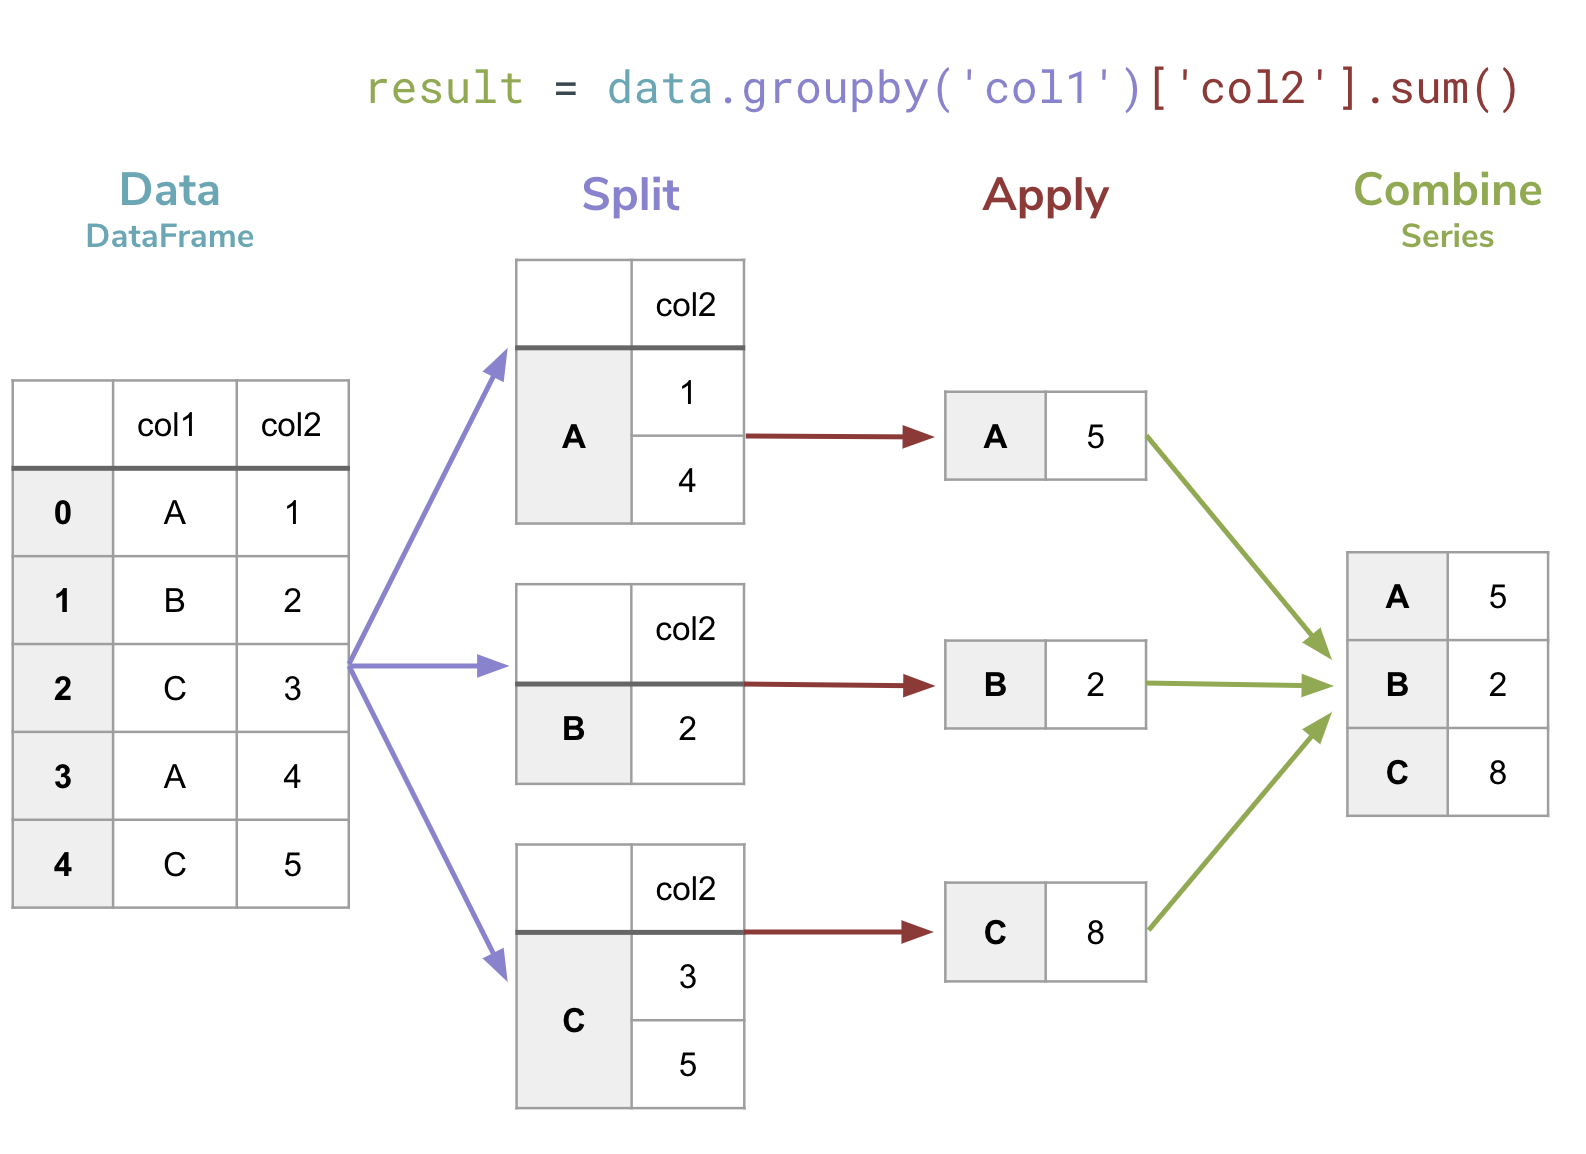

---


### **3.1 Splitting Data with `groupby()`**



The `groupby()` function splits the data into groups based on the specified column(s).


In [482]:
df

,Category,Values1,Values2
0,A,10,50
1,C,20,41
2,B,30,56
3,C,40,52
4,A,50,47
5,B,60,24


In [483]:
# Group by 'Category'
grouped = df.groupby("Category")

In [484]:
# Iterate over groups
print("Iterating Over Groups:")
for key, group in grouped:
    print(f"Group: {key}")
    print(group)
    print()

Iterating Over Groups:
Group: A
  Category  Values1  Values2
0        A       10       50
4        A       50       47

Group: B
  Category  Values1  Values2
2        B       30       56
5        B       60       24

Group: C
  Category  Values1  Values2
1        C       20       41
3        C       40       52



---


### **3.2 Applying Aggregations to Groups**

After grouping, you can apply aggregation functions to each group.


In [485]:
# Sum of values in each group
grouped.sum()

,Values1,Values2
Category,,
A,60,97
B,90,80
C,60,93


In [486]:
# Mean of values in each group
grouped.mean()
df.groupby("Category").mean()

,Values1,Values2
Category,,
A,30.0,48.5
B,45.0,40.0
C,30.0,46.5


In [487]:
# Count of values in each group
grouped.count()
df.groupby("Category").count()

,Values1,Values2
Category,,
A,2,2
B,2,2
C,2,2


In [488]:
# Max of values in each group
df.groupby("Category")[["Values1"]].max()

,Values1
Category,
A,50
B,60
C,40


In [489]:
# Max of values in each group
df.groupby("Category")[["Values2"]].max()

,Values2
Category,
A,50
B,56
C,52


---


### **3.3 GroupBy with Multiple Columns**


To group by multiple columns passing a list of column names to `groupby()`.


In [490]:
# Sample DataFrame
data = {
    "Category": ["A", "B", "A", "B", "A", "B"],
    "Subcategory": ["X", "X", "Y", "Y", "X", "Y"],
    "Values": [10, 20, 30, 40, 50, 60],
}

df = pd.DataFrame(data)
df

,Category,Subcategory,Values
0,A,X,10
1,B,X,20
2,A,Y,30
3,B,Y,40
4,A,X,50
5,B,Y,60


In [491]:
# Group by 'Category' and 'Subcategory'
grouped = df.groupby(["Category", "Subcategory"])

# Sum of values in each group
grouped.sum()

Values
Category Subcategory        
A        X                60
         Y                30
B        X                20
         Y               100

In [492]:
# Group by 'Category' and 'Subcategory'
df.groupby(["Category", "Subcategory"])[["Values"]].max()

Values
Category Subcategory        
A        X                50
         Y                30
B        X                20
         Y                60


---



## **4. Custom Aggregations with `agg()`**


In [493]:
# Sample DataFrame
data = {
    "Category": ["A", "C", "B", "C", "A", "B"],
    "Values1": [10, 20, 30, 40, 50, 60],
    "Values2": [50, 41, 56, 52, 47, 24],
}

df = pd.DataFrame(data)
df

,Category,Values1,Values2
0,A,10,50
1,C,20,41
2,B,30,56
3,C,40,52
4,A,50,47
5,B,60,24


In [494]:
# Custom aggregation functions
def range_of_values(x):
    return x.max() - x.min()

In [495]:
# Apply custom aggregation
print("Custom Aggregation (Range of Values):")
# df.groupby("Category")["Values1"].agg([range_of_values])
df.groupby("Category")["Values1"].aggregate([range_of_values])

Custom Aggregation (Range of Values):


,range_of_values
Category,
A,40
B,30
C,20


In [496]:
# Apply multiple aggregations
print("Multiple Aggregations:")
df.groupby("Category").agg(["sum", "mean", range_of_values])

Multiple Aggregations:


Values1                       Values2                      
             sum  mean range_of_values     sum  mean range_of_values
Category                                                            
A             60  30.0              40      97  48.5               3
B             90  45.0              30      80  40.0              32
C             60  30.0              20      93  46.5              11


---



## **5. Filtering Groups with `filter()`**


In [497]:
# Example: Filter groups where the sum of values is greater than 60
df.groupby("Category").filter(lambda x: x["Values1"].sum() > 60)

,Category,Values1,Values2
2,B,30,56
5,B,60,24



---



## **6. Transforming Data with `transform()`**

The `transform()` function applies a function to each group and returns a DataFrame with the same shape as the original.


In [498]:
df

,Category,Values1,Values2
0,A,10,50
1,C,20,41
2,B,30,56
3,C,40,52
4,A,50,47
5,B,60,24


In [499]:
# Group by 'Category'
grouped = df.groupby("Category")

# Iterate over groups
print("Iterating Over Groups:")
for key, group in grouped:
    print(f"Group: {key}")
    print(group)
    print()

Iterating Over Groups:
Group: A
  Category  Values1  Values2
0        A       10       50
4        A       50       47

Group: B
  Category  Values1  Values2
2        B       30       56
5        B       60       24

Group: C
  Category  Values1  Values2
1        C       20       41
3        C       40       52



In [500]:
# Normalize values within each group
def normalize(col):
    return (col - col.mean()) / col.std()


df.groupby("Category").transform(normalize)

,Values1,Values2
0,-0.707107,0.707107
1,-0.707107,-0.707107
2,-0.707107,0.707107
3,0.707107,0.707107
4,0.707107,-0.707107
5,0.707107,-0.707107


In [501]:
# Normalize values using a lambda function
df.groupby("Category").transform(lambda x: (x - x.mean()) / x.std())

,Values1,Values2
0,-0.707107,0.707107
1,-0.707107,-0.707107
2,-0.707107,0.707107
3,0.707107,0.707107
4,0.707107,-0.707107
5,0.707107,-0.707107


In [502]:
# Transform values to percentages of the group sum
df.groupby("Category")[["Values1"]].transform(lambda x: x / x.sum())

,Values1
0,0.166667
1,0.333333
2,0.333333
3,0.666667
4,0.833333
5,0.666667



---



## **7. Applying Functions with `apply()`**

The `apply()` function is a powerful tool for applying custom functions to DataFrames, Series, or GroupBy objects.



### **7.1 Applying Functions to a DataFrame**


In [503]:
# Example: Apply a function to each column
def double_values(dataframe):

    return dataframe * 2


print("Double Values:")


df.groupby("Category").apply(double_values, include_groups=False)

Double Values:


Values1  Values2
Category                    
A        0       20      100
         4      100       94
B        2       60      112
         5      120       48
C        1       40       82
         3       80      104

In [504]:
# Example: Calculate the ratio of two columns
def ratio(dataframe):
    return dataframe["Values2"] / dataframe["Values1"]



print("Ratio of Values2 to Values1:")
df.groupby("Category").apply(ratio, include_groups=False)

Ratio of Values2 to Values1:


Category   
A         0    5.000000
          4    0.940000
B         2    1.866667
          5    0.400000
C         1    2.050000
          3    1.300000
dtype: float64

---

## **8. Differences Between `apply()` and `transform()`**


#### **1. `apply()`**
- **What it does**:
  - Applies a function to **entire groups** or the entire DataFrame.
  - Can return a **DataFrame**, **Series**, or **scalar value**.
  - Can **access all columns** in the DataFrame or group.

- **Use cases**:
  - When you need to perform complex operations that involve multiple columns.
  - When you want to return a summary or aggregated result for each group.


In [505]:
# Example: Calculate the sum of two columns for each group
def sum_two_columns(group):
    return group["Values1"] + group["Values2"]


df["Sum of Values1 and Values2"] = (
    df.groupby("Category")
    .apply(sum_two_columns, include_groups=False)
    .reset_index(drop=True)
)

df

,Category,Values1,Values2,Sum of Values1 and Values2
0,A,10,50,60
1,C,20,41,97
2,B,30,56,86
3,C,40,52,84
4,A,50,47,61
5,B,60,24,92



---



#### **2. `transform()`**
- **What it does**:
  - Applies a function to **each group** and returns a result with the **same shape** as the input.
  - Can only **access one column at a time** (or multiple columns if explicitly passed).
  - Ideal for **element-wise operations** within groups.

- **Use cases**:
  - When you need to modify or create new columns based on group-level calculations.
  - When you want to preserve the original DataFrame's shape.


In [506]:
# Example: Normalize values within each group
df["Normalized Values1"] = df.groupby("Category")["Values1"].transform(
    lambda x: (x - x.mean()) / x.std()
)

df

,Category,Values1,Values2,Sum of Values1 and Values2,Normalized Values1
0,A,10,50,60,-0.707107
1,C,20,41,97,-0.707107
2,B,30,56,86,-0.707107
3,C,40,52,84,0.707107
4,A,50,47,61,0.707107
5,B,60,24,92,0.707107


---



## **Summary Table**

| Operation          | Description                                                                 | Key Functions/Methods               |
|--------------------|-----------------------------------------------------------------------------|-------------------------------------|
| **Aggregations**   | Compute summary statistics (e.g., sum, mean, count)                         | `sum()`, `mean()`, `count()`, etc.  |
| **GroupBy**        | Split data into groups, apply functions, and combine results                | `groupby()`, `agg()`, `transform()` |
| **Custom Aggs**    | Apply custom aggregation functions to groups                                | `agg()` with custom functions       |
| **Filtering**      | Filter groups based on a condition                                          | `filter()`                          |
| **Transformations**| Apply a function to each group and return a DataFrame of the same shape     | `transform()`                       |
| **Apply**          | Apply a custom function to a DataFrame, Series, or GroupBy object          | `apply()`                           |

---
